In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.models import *
plt.style.use('ggplot')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report
from joblib import dump, load

In [4]:
fake_df = pd.read_csv('data/Fake.csv')
true_df = pd.read_csv('data/True.csv')

In [5]:
fake_df['truth'] = 0
true_df['truth'] = 1
true_df['text'] = true_df['text'].apply(clean_text)
all_news_df = pd.concat([fake_df, true_df])
all_news_df['title'] = all_news_df['title'].apply(clean_titles)

In [6]:
X_train, X_test, y_train, y_test = get_X_y_splits(all_news_df, 'text')

In [7]:
baseline_clf = baseline_model(X_train, y_train)
baseline_predicted = baseline_clf.predict(X_test)

In [25]:
nb_clf = naive_bayes_model(X_train,y_train)
nb_predicted = nb_clf.predict(X_test)
nb_clf.score = nb_clf.score(X_test,y_test)
dump(nb_clf, 'models/naivebayesclf_text.joblib')

['models/naivebayesclf_titles.joblib']

In [27]:
sgd_clf = stochastic_gradient_descent_model(X_train,y_train)
sgd_predicted = sgd_clf.predict(X_test)
sgd_clf_score = sgd_clf.score(X_test,y_test)
dump(sgd_clf, 'models/sgdclf_text.joblib')

['models/sgdclf_titles.joblib']

In [29]:
pa_clf = passive_aggressive_model(X_train,y_train)
pa_predicted = pa_clf.predict(X_test)
pa_clf_score = pa_clf.score(X_test,y_test)
dump(pa_clf, 'models/passiveaggressiveclf_text.joblib')

['models/passiveaggressiveclf_titles.joblib']

In [18]:
rf_clf = random_forest_model(X_train,y_train)
rf_clf_predicted = rf_clf.predict(X_test)
rf_clf_score = rf_clf.score(X_test,y_test)
dump(rf_clf, 'models/randomforestclf_text.joblib')

0.9597378277153558

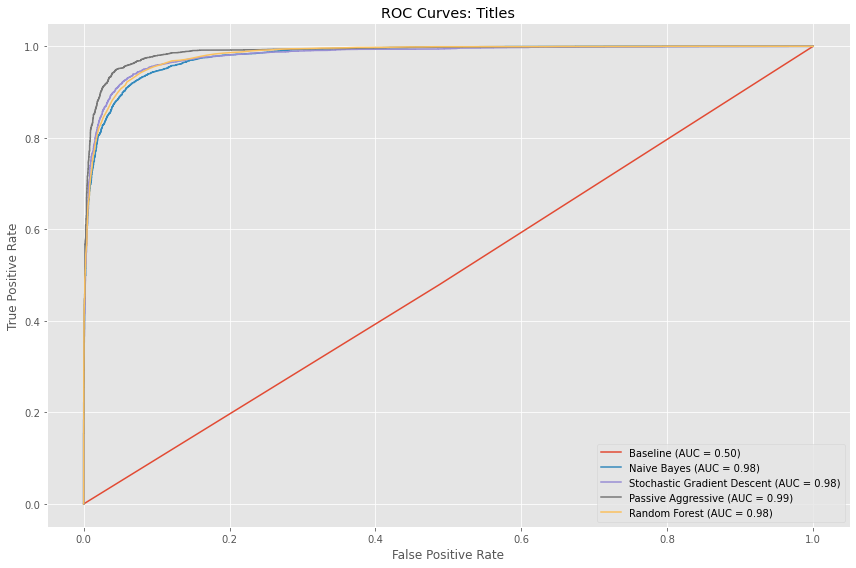

In [68]:
models = [baseline_clf, nb_clf, sgd_clf, pa_clf, rf_clf]
titles = ['Baseline','Naive Bayes', 'Stochastic Gradient Descent', 'Passive Aggressive', 'Random Forest']
fig, ax = plt.subplots(figsize=(12,8))
plot_all_roc_curves(X_test, y_test, models, titles, fig, ax, zoom=False, col='Titles')

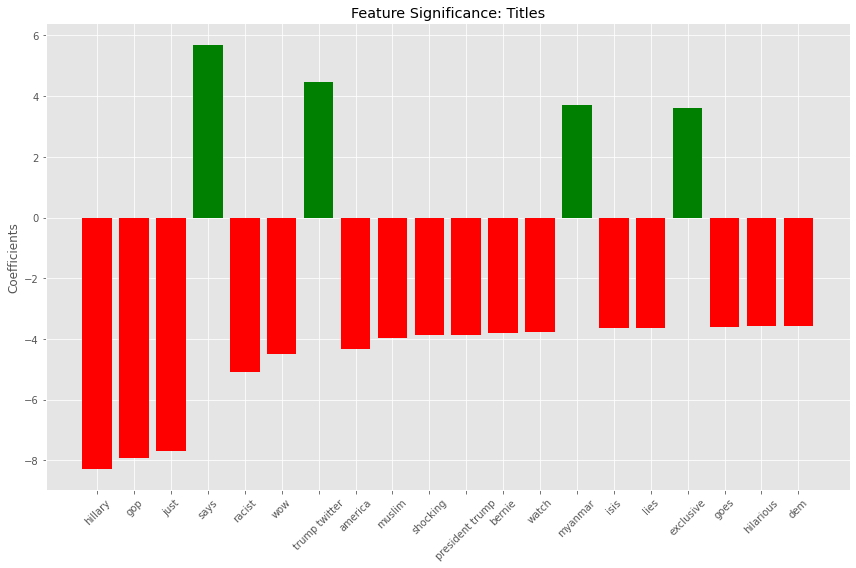

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plot_feature_significance(pa_clf, fig, ax, col='Text')

In [13]:
confusion_matrix(y_test, baseline_predicted)

array([[3168, 2717],
       [2783, 2557]])

In [14]:
confusion_matrix(y_test, nb_predicted)

array([[5550,  335],
       [ 512, 4828]])

In [15]:
confusion_matrix(y_test, sgd_predicted)

array([[5547,  338],
       [ 397, 4943]])

In [16]:
confusion_matrix(y_test, pa_predicted)

array([[5656,  229],
       [ 320, 5020]])

In [31]:
confusion_matrix(y_test, rf_clf_predicted)

array([[5263,  622],
       [ 215, 5125]])

In [17]:
print(classification_report(y_test, pa_predicted, target_names=['Fake News','Real News']))

              precision    recall  f1-score   support

   Fake News       0.95      0.96      0.95      5885
   Real News       0.96      0.94      0.95      5340

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

